# **TREINAMENTO e VALIDAÇÃO DE MODELOS**

#### Importação de dados e bibliotecas

In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Tratamento/Pré-Processamento e Otimização
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV

# Modelos de ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Validação dos modelos
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

plt.style.use('Solarize_Light2')

In [2]:
train = pd.read_csv(filepath_or_buffer="../data/train.csv")
test = pd.read_csv(filepath_or_buffer="../data/test.csv")

# **SEPARAÇÃO DE DADOS**

In [3]:
train.drop(columns="Unnamed: 0", inplace=True)
test.drop(columns="Unnamed: 0", inplace=True)

In [4]:
X_train = train.drop(['Potability'], axis=1)
y_train = train.Potability

X_test = test.drop(['Potability'], axis=1)
y_test = test.Potability

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3220, 8)
(656, 8)
(3220,)
(656,)


# **TREINAMENTO DOS MODELOS**

### K-NEAREST NEIGHBORS

In [6]:
knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier(n_jobs=-1)

### NAIVE BAYS

In [7]:
naive_bays = GaussianNB()
naive_bays.fit(X=X_train, y=y_train)

GaussianNB()

### RANDOM FOREST

In [8]:
rfc = RandomForestClassifier(n_jobs=-1, random_state=2024)
rfc.fit(X=X_train, y=y_train)

RandomForestClassifier(n_jobs=-1, random_state=2024)

### NEURAL NETWORK

# **INFERÊNCIA E VALIDAÇÃO**

### K-NEAREST NEIGHBORS

In [9]:
y_pred = knn.predict(X=X_test)
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.64      0.55      0.59       388
           1       0.46      0.56      0.50       268

    accuracy                           0.55       656
   macro avg       0.55      0.55      0.55       656
weighted avg       0.57      0.55      0.55       656



### NAIVE BAYS

In [10]:
y_pred = naive_bays.predict(X=X_test)
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.61      0.43      0.51       388
           1       0.42      0.60      0.49       268

    accuracy                           0.50       656
   macro avg       0.51      0.52      0.50       656
weighted avg       0.53      0.50      0.50       656



### RANDOM FOREST

In [11]:
y_pred = rfc.predict(X=X_test)
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.63      0.68      0.65       388
           1       0.47      0.41      0.44       268

    accuracy                           0.57       656
   macro avg       0.55      0.55      0.55       656
weighted avg       0.56      0.57      0.56       656



### NEURAL NETWORK

# **FEATURE IMPORTANCE TREE**

Text(0.5, 1.0, 'Feature Importance - RandomForest')

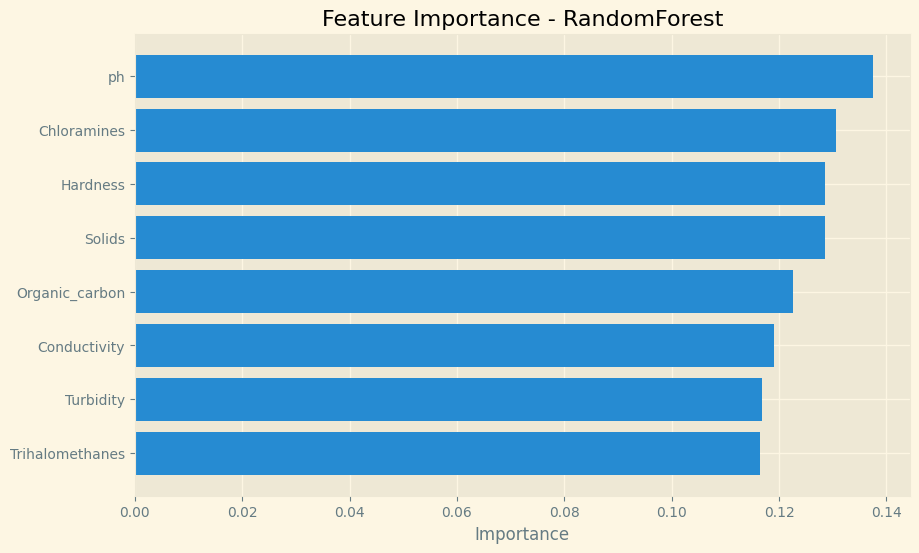

In [13]:
feature_importance = rfc.feature_importances_
columns = X_train.columns
sorted_id = feature_importance.argsort()

plt.figure(figsize=(10,6))
plt.barh(columns[sorted_id], feature_importance[sorted_id])
plt.xlabel("Importance")
plt.title('Feature Importance - RandomForest')